## Simple Linear Regression with Gradient Descent

We will build a simple Linear Regression model using Gradient Descent optimization for learning purpose.

**Cost Function**: 
$$ J(w) = \frac{1}{2m} \sum_{i=1}^m (y_{i} - h(x_{i})^{T}w)^{2}$$  
**Compute the Derivative**: 
$$ w_{j} := w_{j} - \alpha\frac{1}{m} (\sum_{i=1}^mh_{j}(x_{j})(y_{i} - h(x_{i})^{T}w^{(t)})) $$  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('/Users/Multi_linear.csv')

Let's use a simple data set for this demo. Column 0 and 1 are input features and column 2 is the output variable.
(data [source](https://www.coursera.org/learn/machine-learning))


In [3]:
df.head(5)

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Let's define functions to initialize weights, calculate cost function and derivative for GD.

In [4]:
def initial_weights(dimention):
    """
    This function creates a vector of shape (dim, 1) for parameter w
    
    Argument:
    dimention -- number of parameters
    """
    w = np.ones(shape=(dimention, 1))
    assert(w.shape == (dimention, 1))
    return w

In [5]:
def predict_output(X, weights):
    """
    Argument:
    X -- feature matrix containing the features as columns
    weights -- regression parameters
    """
    predictions = np.dot(X, weights)
    return predictions

In [6]:
def Cost(X, y, weights):
    
    """
    Take in a numpy array X, y, weights and calculate the cost function
    """
    
    m=len(y)
    predictions = predict_output(X, weights)
    square_error = (predictions - y)**2
    
    return 1/(2*m) * np.sum(square_error)

In [7]:
def gradient_descent(X, y, weights, alpha, num_iters):
    
    """
    Argument:
    X, y
    weights -- regression parameters
    alpha -- learning rate
    num_iters -- num_iters gradient steps
    

    Return:
    weights and the list of the cost of weights during each iteration
    """
    
    m = len(y)
    cost_history = []
    
    for i in range(num_iters):
        predictions = predict_output(X, weights)
        derivative = np.dot(X.T, (predictions - y))
        descent = alpha * 1/m * derivative
        weights -= descent
        cost_history.append(Cost(X,y,weights))
    return weights, cost_history

In [8]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std
    return X_norm

#### Prepare data and normalize it

In [9]:
data = df.values
m = data.shape[0]
X = data[:,0:2]
X = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y = data[:,-1].reshape(m,1)

#### Update weights using gradient descent

In [13]:
%%time
w_initial = initial_weights(X.shape[1])
learning_rate = 0.1
iterations = 400
weights, cost_history = gradient_descent(X, y, w_initial, learning_rate, iterations)

CPU times: user 21.9 ms, sys: 7.86 ms, total: 29.8 ms
Wall time: 23.6 ms


#### Estimated parameters for our Linear Regression model

In [11]:
print("h(x) = "+str(round(weights[0,0],2))+" + "+str(round(weights[1,0],2))+"x1 + "+str(round(weights[2,0],2))+"x2")

h(x) = 340412.66 + 109447.8x1 + -6578.35x2


#### Visualize the learning process

Text(0.5,1,'Cost function using Gradient Descent')

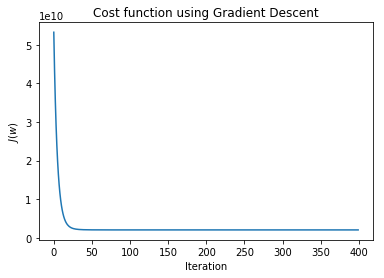

In [12]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(w)$")
plt.title("Cost function using Gradient Descent")